In [4]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pylab as plt
from matplotlib import dates
from datetime import datetime
import numpy as np
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import Axes3D
from openpyxl import Workbook
pd.options.display.width = 1000
pd.options.display.max_rows = None
# pd.set_option('display.max_columns', 50)
# pd.set_option('display.width', 1000)


data = read_csv('C:\\Users\\SZ\\PycharmProjects\\berlin_weather\\ber_weather_combined_1876_2019.csv', 
                header=0, parse_dates=[0])
print("--- Berlin weather data from 1876 to 2019 is ready ---\n")
print(data.head())
print(data.info())

--- Berlin weather data from 1876 to 2019 is ready ---

  Measurement day  Max daily temp  Min daily temp  Medium daily temp
0      1876-01-01             3.5            -3.0                2.2
1      1876-01-02             2.8             2.3                2.5
2      1876-01-03             2.8            -1.8                0.3
3      1876-01-04            -1.8            -7.0               -5.8
4      1876-01-05            -6.8           -13.3               -9.8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52400 entries, 0 to 52399
Data columns (total 4 columns):
Measurement day      52400 non-null datetime64[ns]
Max daily temp       52400 non-null float64
Min daily temp       52400 non-null float64
Medium daily temp    52400 non-null float64
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.6 MB
None


In [9]:
# Days with temperatures over a value.
data['year'] = pd.DatetimeIndex(data['Measurement day']).year
temp = 25
over_temp = data[(data['Max daily temp'] > temp)].groupby(['year'])['Measurement day'].count().reset_index()
print(f"\nDays per year with temperatures over {temp}:\n", over_temp)


Days per year with temperatures over 25:
      year  Measurement day
0    1876               33
1    1877               32
2    1878               22
3    1879               19
4    1880               43
5    1881               33
6    1882               28
7    1883               38
8    1884               35
9    1885               35
10   1886               45
11   1887               25
12   1888               24
13   1889               50
14   1890               26
15   1891               19
16   1892               44
17   1893               37
18   1894               24
19   1895               41
20   1896               34
21   1897               33
22   1898               29
23   1899               33
24   1900               37
25   1901               47
26   1902               24
27   1903               30
28   1904               37
29   1905               39
30   1906               42
31   1907               21
32   1908               33
33   1909               16
34   1910   

In [14]:
from bokeh.plotting import figure, show, output_notebook

p = figure(plot_width=1400, plot_height=600)
p.vbar(x=over_temp['year'], width=0.5, bottom=0,
       top=over_temp['Measurement day'], color="firebrick")

output_notebook()
show(p)

Loading BokehJS ...

In [5]:
# Ploting all years in 3d with Bokeh

from bokeh.driving import count
from bokeh.io import curdoc
from bokeh.models import ColumnDataSource

data1 = data.drop(['Min daily temp', 'Medium daily temp'], axis=1)
print(data1.head())


  Measurement day  Max daily temp
0      1876-01-01             3.5
1      1876-01-02             2.8
2      1876-01-03             2.8
3      1876-01-04            -1.8
4      1876-01-05            -6.8


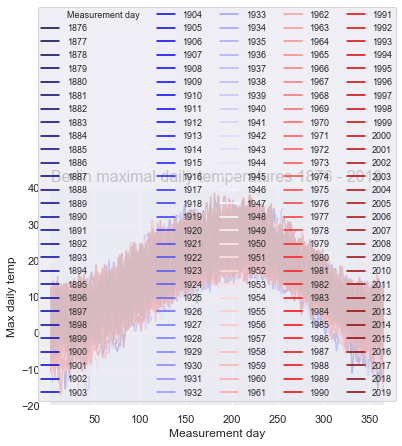

In [6]:
# Ploting all years on one plot

sns.lineplot(x=data['Measurement day'].dt.dayofyear,
			y=data['Max daily temp'],
			hue=data['Measurement day'].dt.year,
			legend='full',
			palette="seismic",
			ci=None,
			);
plt.title("Berlin maximal daily temperatures 1876 - 2019", size=16)
plt.legend(ncol=5, loc='lower center', fontsize=9)
plt.xlim(1, 366)
plt.ylim(-20, 40)
plt.show()

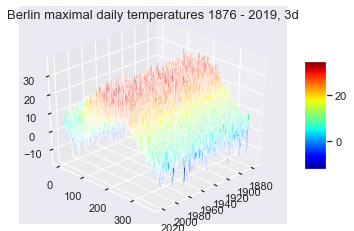

In [7]:
# Ploting all years on one plot 3d

fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_trisurf(data['Measurement day'].dt.year,
					data['Measurement day'].dt.dayofyear,
					data['Max daily temp'],
					cmap=plt.cm.jet, linewidth=0.2)

# to Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(30, 45)
plt.title("Berlin maximal daily temperatures 1876 - 2019, 3d", size=13)
plt.show()

In [4]:
conda install foliantcontrib.imagemagick

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - foliantcontrib.imagemagick

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [3]:
# Ploting all years on one plot 3d animated

# We are going to do 20 plots, for 20 different angles
for angle in range(70,210,2):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_trisurf(data['Measurement day'].dt.year,
                        data['Measurement day'].dt.dayofyear,
                        data['Max daily temp'],
                        cmap=plt.cm.jet, linewidth=0.2)

    # Set the angle of the camera
    ax.view_init(30,angle)

    # Save it
    filename='ANIMATION/weather_step'+str(angle)+'.png'
    plt.savefig(filename, dpi=96)
    plt.gca()

# Then use image magick (this is bash, not python)
convert -delay 50 Volcano*.png animated_volcano.gif

# to Add a color bar which maps values to colors.
# fig.colorbar(surf, shrink=0.5, aspect=5)
# ax.view_init(30, 45)
# plt.title("Berlin maximal daily temperatures 1876 - 2019, 3d", size=13)
# plt.show()

SyntaxError: invalid syntax (<ipython-input-3-d119cbb7c645>, line 21)